# 1.导入必要的包 

In [50]:
# -*- coding:utf-8 -*-
import sys
#矩阵操作
import numpy as np
#处理csv文件 SQL数据处理
import pandas as pd

#画直方图用，对数据结果进行可视化
import matplotlib.pyplot as plt
#对matplotlib进行一次封装，画图更容易，使用更方便
import seaborn as sns


# 2.共享单车骑行量预测
读入特征工程后的文件

In [51]:
#读取数据
df = pd.read_csv("day.csv")
#显示前五行，了解每列（特征）的情况
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [52]:
#数据的总体信息
#一共包含多少个样本点，一共多少列，列的名字，非空数值，数据类型
#X 需要是一个数值，方便处理，对字符串的需要进行编码，才能送到数据模型中
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


# 特征工程

In [64]:
y = df['cnt']
X = df.drop(['cnt', 'casual', 'registered', 'instant', 'dteday'], axis = 1)
#对类别性特征进行独热编码
categorical_features =['season', 'mnth', 'weathersit', 'weekday']
for col in categorical_features:
    X[col] = X[col].astype('object')

X_cat = X[categorical_features]
#独热编码
X_cat = pd.get_dummies(X_cat)
X_cat.head()

,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,...,weathersit_1,weathersit_2,weathersit_3,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [61]:
X.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900


In [65]:
#去掉类别性特征
X = X.drop(categorical_features, axis = 1)
#获得特征名称，进行特征比较
feat_names = X.columns
#对数值型特征进行标准化处理，这里使用MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

mms_X = MinMaxScaler()
mms_y = MinMaxScaler()

X = mms_X.fit_transform(X)
#将y转换成二维数组
y = mms_y.fit_transform(np.array(y).reshape(-1, 1))
#将数值型转换为dataFrame格式
X_num = pd.DataFrame(data = X, columns = feat_names, index = range(X.shape[0]))
X = pd.concat([X_num, X_cat], axis = 1)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [67]:
#最小二乘
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred_lr = lr.predict(X_test)
y_train_pred_lr = lr.predict(X_train)

print('最小二乘回归的测试集RMSE：', np.sqrt(mean_squared_error(y_test,y_test_pred_lr)))
print('最小二乘回归的训练集RMSE：', np.sqrt(mean_squared_error(y_train,y_train_pred_lr)))

最小二乘回归的测试集RMSE： 0.14201760930271484
最小二乘回归的训练集RMSE： 0.13708436316114087


In [68]:
#岭回归
#
alphas = [0.01,0.1,1,10,100]
ridge = RidgeCV(alphas=alphas, store_cv_values=True)
ridge.fit(X_train, y_train)
y_test_pred_ridge = ridge.predict(X_test)
y_train_pred_ridge = ridge.predict(X_train)

print('岭回归的测试集RMSE：', np.sqrt(mean_squared_error(y_test,y_test_pred_ridge)))
print('岭回归的训练集RMSE：', np.sqrt(mean_squared_error(y_train,y_train_pred_ridge)))


岭回归的测试集RMSE： 0.08672903079158813
岭回归的训练集RMSE： 0.08757043471168033


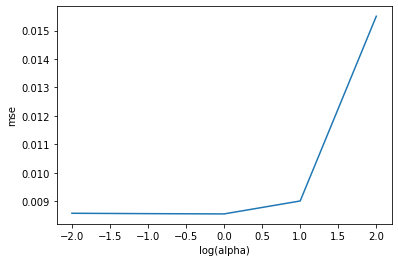

alpha is: 1.0


In [69]:
#可视化
mse_mean = np.mean(ridge.cv_values_,axis=0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1))
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:', ridge.alpha_)

默认的超参数选择的是最优超参数1，接下来在1附近寻找有没有更好的超参数

岭回归的测试集RMSE： 0.08671694465373474
岭回归的训练集RMSE： 0.08754040117875647


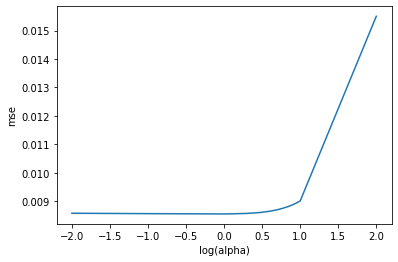

alpha is: 0.8700000000000001


In [70]:
alphas = sorted([0.01,0.1,1,10,100] + list(np.arange(2,10,1)) + list(np.arange(0.8,1.2,0.01))) #新增0.8:0.01:1.2与2:10
#再做一次岭回归
ridge = RidgeCV(alphas=alphas, store_cv_values=True)
ridge.fit(X_train, y_train)
y_test_pred_ridge = ridge.predict(X_test)
y_train_pred_ridge = ridge.predict(X_train)

print('岭回归的测试集RMSE：', np.sqrt(mean_squared_error(y_test,y_test_pred_ridge)))
print('岭回归的训练集RMSE：', np.sqrt(mean_squared_error(y_train,y_train_pred_ridge)))

#可视化
mse_mean = np.mean(ridge.cv_values_,axis=0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1))
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:', ridge.alpha_)

从结果上来看，测试集和训练接的RSME没有太大变化，所以超参数取1是比较合适的

In [72]:
#LassoCV
alphas = [0.01,0.1,1,10,100]
lasso = LassoCV(alphas=alphas)
lasso.fit(X_train, y_train)
y_test_pred_lasso = lasso.predict(X_test)
y_train_pred_lasso = lasso.predict(X_train)

print('Lasso回归的测试集RMSE：', np.sqrt(mean_squared_error(y_test,y_test_pred_lasso)))
print('Lasso回归的训练集RMSE：', np.sqrt(mean_squared_error(y_train,y_train_pred_lasso)))
print ('alpha is:', lasso.alpha_)

Lasso回归的测试集RMSE： 0.1179057436066585
Lasso回归的训练集RMSE： 0.11730638647668161
alpha is: 0.01


/home/tianyu/.local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tianyu/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


在0.01附近继续寻找有没有更好的超参数

In [73]:
alphas = list(np.arange(0.001,0.01,0.001))
lasso = LassoCV(alphas=alphas)
lasso.fit(X_train, y_train)
y_test_pred_lasso = lasso.predict(X_test)
y_train_pred_lasso = lasso.predict(X_train)

print('Lasso回归的测试集RMSE：', np.sqrt(mean_squared_error(y_test,y_test_pred_lasso)))
print('Lasso回归的训练集RMSE：', np.sqrt(mean_squared_error(y_train,y_train_pred_lasso)))
print ('alpha is:', lasso.alpha_)

Lasso回归的测试集RMSE： 0.09117169147140478
Lasso回归的训练集RMSE： 0.08966347805102814
alpha is: 0.001


/home/tianyu/.local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tianyu/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [74]:
alphas = list(np.arange(0.0001,0.001,0.0001))
lasso = LassoCV(alphas=alphas)
lasso.fit(X_train, y_train)
y_test_pred_lasso = lasso.predict(X_test)
y_train_pred_lasso = lasso.predict(X_train)

print('Lasso回归的测试集RMSE：', np.sqrt(mean_squared_error(y_test,y_test_pred_lasso)))
print('Lasso回归的训练集RMSE：', np.sqrt(mean_squared_error(y_train,y_train_pred_lasso)))
print ('alpha is:', lasso.alpha_)

Lasso回归的测试集RMSE： 0.0886314843750972
Lasso回归的训练集RMSE： 0.08732637717848832
alpha is: 0.0001


/home/tianyu/.local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tianyu/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
前两项对比的话，RSME有明显变动，继续在0.0001附近寻找最优参数

In [75]:
alphas = list(np.arange(1e-5,1e-4,1e-5))
lasso = LassoCV(alphas=alphas)
lasso.fit(X_train, y_train)
y_test_pred_lasso = lasso.predict(X_test)
y_train_pred_lasso = lasso.predict(X_train)

print('Lasso回归的测试集RMSE：', np.sqrt(mean_squared_error(y_test,y_test_pred_lasso)))
print('Lasso回归的训练集RMSE：', np.sqrt(mean_squared_error(y_train,y_train_pred_lasso)))
print ('alpha is:', lasso.alpha_)

Lasso回归的测试集RMSE： 0.08859305183112058
Lasso回归的训练集RMSE： 0.0873110043122541
alpha is: 7.000000000000001e-05


/home/tianyu/.local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tianyu/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


比较这两次结果，虽然RSME有变化，但是变化不大，可以考虑将7e-05作为最优超参数

In [76]:
fs = pd.DataFrame({"columns":list(X.columns), "lr_coef":list((lr.coef_.T)), "ridge_coef":list((ridge.coef_.T)), "lasso_coef":list((lasso.coef_.T))})
fs.sort_values(by=['lr_coef'],ascending=False)

,columns,lr_coef,ridge_coef,lasso_coef
10,season_4,[17753941056714.215],[0.08206751002919266],0.064990
8,season_2,[17753941056714.117],[0.017928461594205858],0.000000
7,season_1,[17753941056714.01],[-0.0989333326575658],-0.117243
9,season_3,[17753941056713.94],[-0.001062638965831697],-0.017829
31,weekday_5,[1546131767322.4543],[-0.0026801448160412578],-0.000000
28,weekday_2,[1546131767322.4536],[-0.0038512682362576156],-0.000216
27,weekday_1,[1546131767322.4417],[-0.01945723420173221],-0.015981
29,weekday_3,[1546131767322.4248],[-0.001169489828902831],0.001899
30,weekday_4,[1546131767322.3486],[0.003144416699318142],0.005295
23,weathersit_1,[539898589440.91785],[0.09120313952745043],0.047272


In [ ]:
比较各个模型的特征系数，最小二乘波动性最大，非常不稳定
Lasso和Ridge两者相比的话，Ridge效果最好
总的来说Lasso和岭回归推荐使用，最小二乘对特征间存在较强相关性的时候波动性比较大